<a href="https://colab.research.google.com/github/Adyasha-Choudhury/ML_classic/blob/main/Adyasha_Facebook_Live_Sellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

importing dataset

In [ ]:
dataset= pd.read_csv('Facebook_Marketplace_data.csv')

In [ ]:
print(dataset)

      status_id status_type status_published  num_reactions  num_comments  \
0             1       video   4/22/2018 6:00            529           512   
1             2       photo  4/21/2018 22:45            150             0   
2             3       video   4/21/2018 6:17            227           236   
3             4       photo   4/21/2018 2:29            111             0   
4             5       photo   4/18/2018 3:22            213             0   
...         ...         ...              ...            ...           ...   
7045       7046       photo   9/24/2016 2:58             89             0   
7046       7047       photo  9/23/2016 11:19             16             0   
7047       7048       photo  9/21/2016 23:03              2             0   
7048       7049       photo   9/20/2016 0:43            351            12   
7049       7050       photo  9/10/2016 10:30             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0 

clustering requires only one matrix (X_org in our case). And, the last four columns are irrelevant, so they're eliminated

this is the original matrix, but not all columns will be used for clustering




In [ ]:
X_org= dataset.iloc[:,:-4] #eliminating last 4 columns
print(X_org)

      status_id status_type status_published  num_reactions  num_comments  \
0             1       video   4/22/2018 6:00            529           512   
1             2       photo  4/21/2018 22:45            150             0   
2             3       video   4/21/2018 6:17            227           236   
3             4       photo   4/21/2018 2:29            111             0   
4             5       photo   4/18/2018 3:22            213             0   
...         ...         ...              ...            ...           ...   
7045       7046       photo   9/24/2016 2:58             89             0   
7046       7047       photo  9/23/2016 11:19             16             0   
7047       7048       photo  9/21/2016 23:03              2             0   
7048       7049       photo   9/20/2016 0:43            351            12   
7049       7050       photo  9/10/2016 10:30             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0 

Last 4 columns are eliminated successfully. Currently, X_org is a dataframe object.
So, now we convert X_org into a numpy array form so that it can be worked with.



In [ ]:
X_org= dataset.iloc[:,:-4].values
print(X_org)

[[1 'video' '4/22/2018 6:00' ... 1 1 0]
 [2 'photo' '4/21/2018 22:45' ... 0 0 0]
 [3 'video' '4/21/2018 6:17' ... 1 0 0]
 ...
 [7048 'photo' '9/21/2016 23:03' ... 0 0 0]
 [7049 'photo' '9/20/2016 0:43' ... 0 0 0]
 [7050 'photo' '9/10/2016 10:30' ... 0 0 0]]


status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys - columns to be used. so two columns are eliminated for clustering

In [ ]:
X_df=dataset.iloc[:,:-4].drop(columns= ['status_id','status_published'])
X= dataset.iloc[:,:-4].drop(columns= ['status_id','status_published']).values
print(X)
print(X[0]) #checking if columns are removed

[['video' 529 512 ... 1 1 0]
 ['photo' 150 0 ... 0 0 0]
 ['video' 227 236 ... 1 0 0]
 ...
 ['photo' 2 0 ... 0 0 0]
 ['photo' 351 12 ... 0 0 0]
 ['photo' 17 0 ... 0 0 0]]
['video' 529 512 262 432 92 3 1 1 0]


checking for missing values

In [ ]:
rows_with_missing = X_df[X_df.isnull().any(axis=1)]
print(rows_with_missing)


Empty DataFrame
Columns: [status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys]
Index: []


This means that the required columns/attributes donot have any missing values in any datapoint.

In [ ]:
categories = X_df['status_type'].unique()
print("Unique Categories:", categories)

Unique Categories: ['video' 'photo' 'link' 'status']


so, there are 4 categories to be encoded

In [ ]:
print(X[:,0])

['video' 'photo' 'video' ... 'photo' 'photo' 'photo']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 0.0 ... 1 1 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 1 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]


Instead of column 0, there are 4 columns, each representing video, photo,link and status

In [ ]:
#printing values and comparing with original dataset to find out which column is what category
print(X[0]) #video
print(X[1]) #photo
print(X[90]) #link
print(X[210]) #status

[0.0 0.0 0.0 1.0 529 512 262 432 92 3 1 1 0]
[0.0 1.0 0.0 0.0 150 0 0 150 0 0 0 0 0]
[1.0 0.0 0.0 0.0 16 9 0 15 1 0 0 0 0]
[0.0 0.0 1.0 0.0 33 6 3 31 2 0 0 0 0]


Feature scaling for columns starting from index 4

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[:,4:]= sc.fit_transform(X[:,4:])
print(X)

[[0.0 0.0 0.0 ... 0.07671305463840127 0.47357035270389564
  -0.15574802701539486]
 [0.0 1.0 0.0 ... -0.17600985900679916 -0.15258699661389585
  -0.15574802701539486]
 [0.0 0.0 0.0 ... 0.07671305463840127 -0.15258699661389585
  -0.15574802701539486]
 ...
 [0.0 1.0 0.0 ... -0.17600985900679916 -0.15258699661389585
  -0.15574802701539486]
 [0.0 1.0 0.0 ... -0.17600985900679916 -0.15258699661389585
  -0.15574802701539486]
 [0.0 1.0 0.0 ... -0.17600985900679916 -0.15258699661389585
  -0.15574802701539486]]


Now, the data is ready to be used for clustering.
Next, by using the ELBOW METHOD, we train the cluster

In [ ]:
# 4. Use the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
k=[]
for i in range(1,10):  #k is 1 to 10
  kmeans= KMeans(n_clusters=i,init= 'k-means++', random_state= 42)  #creating one kmeans object for each k. k-means++ is an algorithm that improves the quality of the k-means clustering algorithm by selecting initial cluster centroids more intelligently
  #fit function
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  k.append(i)


plotting curve to find kink/elbow

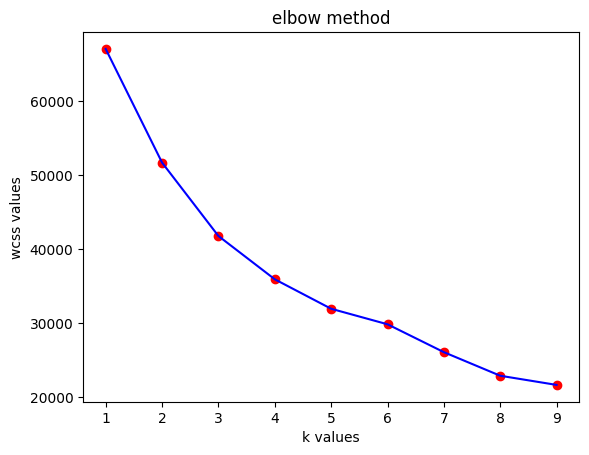

In [ ]:
plt.plot(k,wcss,color='blue')
plt.scatter(k,wcss,color='red')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.title('elbow method')
plt.show()

since the curve is not directly reducing, let's try using k= 1 to 20 -

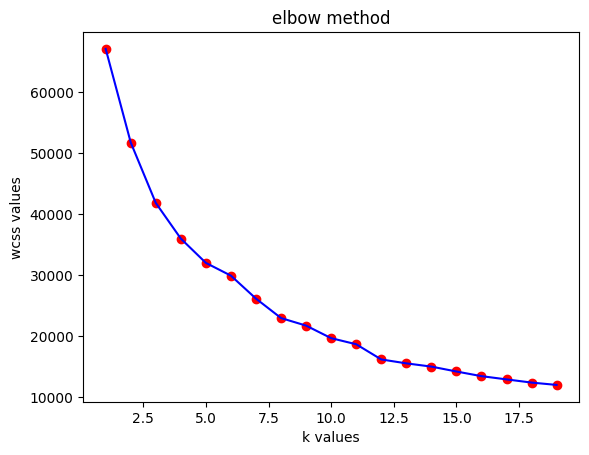

In [ ]:
from sklearn.cluster import KMeans
wcss = []
k=[]
for i in range(1,20):  #k is 1 to 20
  kmeans= KMeans(n_clusters=i,init= 'k-means++', random_state= 42)  #creating one kmeans object for each k. k-means++ is an algorithm that improves the quality of the k-means clustering algorithm by selecting initial cluster centroids more intelligently
  #fit function
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  k.append(i)

plt.plot(k,wcss,color='blue')
plt.scatter(k,wcss,color='red')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.title('elbow method')
plt.show()


let's take 5 as the elbow. So, k=5

In [ ]:
kmeans= KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
y_kmeans=  kmeans.predict(X) #the predicted label values get stored in y_kmeans

In [ ]:
print(y_kmeans) #labels of each datapoint
print(X)

[4 0 0 ... 0 0 0]
[[0.0 0.0 0.0 ... 0.07671305463840127 0.47357035270389564
  -0.15574802701539486]
 [0.0 1.0 0.0 ... -0.17600985900679916 -0.15258699661389585
  -0.15574802701539486]
 [0.0 0.0 0.0 ... 0.07671305463840127 -0.15258699661389585
  -0.15574802701539486]
 ...
 [0.0 1.0 0.0 ... -0.17600985900679916 -0.15258699661389585
  -0.15574802701539486]
 [0.0 1.0 0.0 ... -0.17600985900679916 -0.15258699661389585
  -0.15574802701539486]
 [0.0 1.0 0.0 ... -0.17600985900679916 -0.15258699661389585
  -0.15574802701539486]]


plotting type of shares and number of reactions

Text(0.5, 0, 'number of reactions')

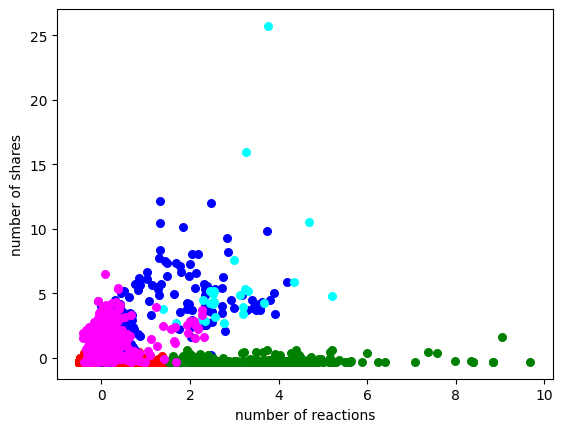

In [ ]:
plt.scatter(X[y_kmeans==0, 4],X[y_kmeans==0,6], s=30, c='red' , label='cluster 1')
plt.scatter(X[y_kmeans==1, 4],X[y_kmeans==1,6], s=30, c='blue' , label='cluster 2')
plt.scatter(X[y_kmeans==2, 4],X[y_kmeans==2,6], s=30, c='green' , label='cluster 3')
plt.scatter(X[y_kmeans==3, 4],X[y_kmeans==3,6], s=30, c='cyan' , label='cluster 4')
plt.scatter(X[y_kmeans==4, 4],X[y_kmeans==4,6], s=30, c='magenta' , label='cluster 5')
plt.ylabel('number of shares')
plt.xlabel('number of reactions')

In [ ]:
# the cyan cluster gave most shares in moderate number of reactions. Let's analyse its datapoints
X_d = pd.DataFrame(X)
indices = list(X_d[y_kmeans == 3].index)
print(indices)
for i in indices:
  print(X_org[i])

[4489, 4491, 4494, 4502, 4517, 4518, 4526, 4527, 4528, 4535, 4542, 4543, 4557, 4565, 4571, 4575, 4577, 4600, 4604, 4611, 4619, 4624, 4636, 4643, 4660]
[4490 'video' '6/7/2018 6:35' 1360 1358 597 978 278 98 5 0 1]
[4492 'video' '6/6/2018 6:28' 1405 1156 607 1041 237 114 9 3 1]
[4495 'video' '6/2/2018 6:41' 874 1099 541 657 120 90 4 2 1]
[4503 'video' '5/29/2018 6:14' 1406 1609 726 1097 221 76 10 1 1]
[4518 'video' '5/21/2018 6:18' 1368 1794 718 980 306 74 3 4 1]
[4519 'video' '5/20/2018 8:40' 1741 2257 2139 1155 504 69 11 2 0]
[4527 'video' '5/17/2018 8:38' 1678 1499 685 1227 165 278 8 0 0]
[4528 'video' '5/17/2018 6:06' 1290 1530 627 1032 149 106 3 0 0]
[4529 'video' '5/16/2018 9:23' 1309 1267 413 1006 100 200 3 0 0]
[4536 'video' '5/14/2018 6:28' 1758 1890 718 1181 385 89 100 2 1]
[4543 'video' '5/10/2018 6:01' 1611 2314 1041 1139 316 104 50 2 0]
[4544 'video' '5/9/2018 8:33' 1970 2903 3424 1330 482 138 13 5 2]
[4558 'video' '5/2/2018 7:39' 1228 887 408 865 259 89 9 3 3]
[4566 'video'

In [ ]:
# although the red cluster received less reactions as well as shares. let's analyse why-
indices_red = list(X_d[y_kmeans == 1].index)
print(indices_red)
for i in indices_red:
  print(X_org[i])

[99, 343, 413, 480, 482, 498, 573, 726, 2919, 2975, 3154, 3246, 3250, 3297, 3304, 3313, 3334, 3348, 3350, 3355, 3530, 3848, 3851, 3854, 3858, 3862, 3864, 3867, 3868, 3870, 3871, 3872, 3874, 3876, 3881, 3882, 3884, 3885, 3887, 3891, 3892, 3897, 3898, 3907, 3920, 4482, 4483, 4487, 4488, 4490, 4495, 4496, 4498, 4504, 4505, 4506, 4509, 4510, 4511, 4514, 4519, 4521, 4523, 4524, 4529, 4530, 4532, 4533, 4534, 4537, 4538, 4541, 4546, 4548, 4553, 4555, 4559, 4562, 4564, 4568, 4570, 4573, 4583, 4585, 4588, 4590, 4605, 4608, 4622, 4640, 4645, 4647, 4649, 5753, 5887, 5891, 6174, 6193, 6204, 6225, 6244, 6255, 6291, 6295, 6296, 6300, 6307, 6308, 6311, 6317, 6402, 6417, 6433, 6448, 6635, 6641, 6659, 6701, 6722, 6737, 6757, 6762, 6767, 6769, 6770, 6775, 6786, 6787, 6796, 6799, 6800, 6808, 6810, 6814, 6827, 6835, 6839, 6848, 6851, 6861, 6865, 6873, 6906, 6974]
[100 'video' '11/18/2017 1:23' 1493 1979 753 1333 139 9 3 8 1]
[344 'video' '3/18/2017 9:09' 1379 769 69 1131 234 4 4 2 4]
[414 'video' '1/14/20

Text(0.5, 0, 'number of reactions')

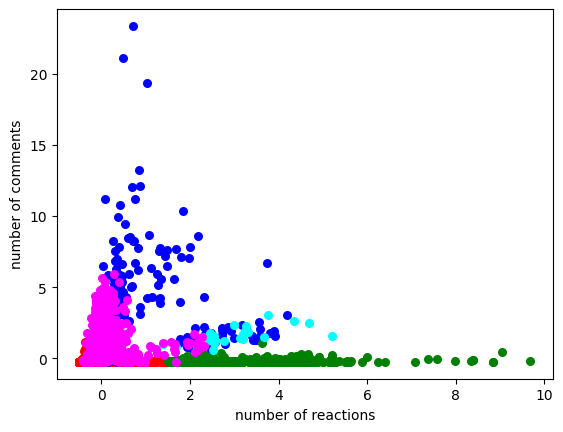

In [ ]:
plt.scatter(X[y_kmeans==0, 4],X[y_kmeans==0,5], s=30, c='red' , label='cluster 1')
plt.scatter(X[y_kmeans==1, 4],X[y_kmeans==1,5], s=30, c='blue' , label='cluster 2')
plt.scatter(X[y_kmeans==2, 4],X[y_kmeans==2,5], s=30, c='green' , label='cluster 3')
plt.scatter(X[y_kmeans==3, 4],X[y_kmeans==3,5], s=30, c='cyan' , label='cluster 4')
plt.scatter(X[y_kmeans==4, 4],X[y_kmeans==4,5], s=30, c='magenta' , label='cluster 5')
plt.ylabel('number of comments')
plt.xlabel('number of reactions')

to show all attributes -

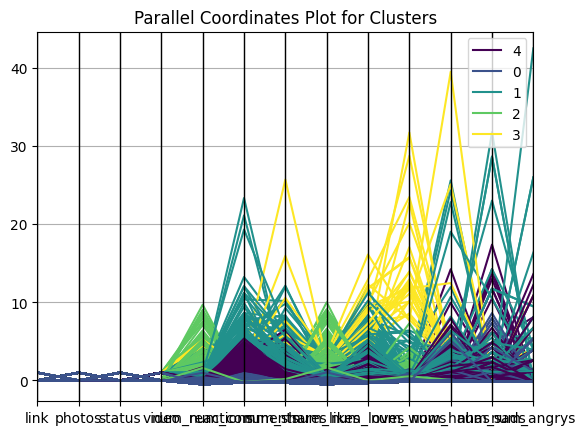

In [ ]:
from pandas.plotting import parallel_coordinates

# Assuming your data is in a DataFrame
df = pd.DataFrame(X, columns=['link','photos','status','video', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'])
df['Cluster'] = y_kmeans #labels

parallel_coordinates(df, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot for Clusters')
plt.show()



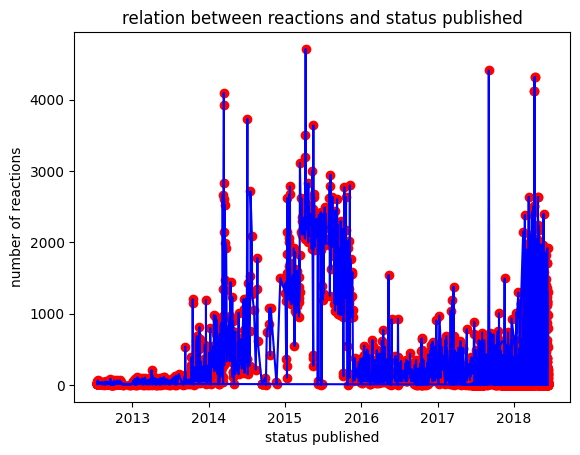

In [ ]:
#1. How does the time of upload (status_published) affect num_reaction?
stat_pub= pd.to_datetime(X_org[:,2])
num_re = X_org[:,3]
plt.plot(stat_pub,num_re,color='blue')
plt.scatter(stat_pub,num_re,color='red')
plt.xlabel('status published')
plt.ylabel('number of reactions')
plt.title('relation between reactions and status published')
plt.show()


In [ ]:
print(X[0])
print(X_df)

[0.0 0.0 0.0 1.0 0.6461039432922195 0.32335034676163266 1.6868787977106667
 0.4827266119401378 1.9832664251009027 0.19619589754362335
 0.07671305463840127 0.47357035270389564 -0.15574802701539486]
     status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video            529           512         262        432   
1          photo            150             0           0        150   
2          video            227           236          57        204   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
...          ...            ...           ...         ...        ...   
7045       photo             89             0           0         89   
7046       photo             16             0           0         14   
7047       photo              2             0           0          1   
7048       photo            351            12          22        349   
7049       

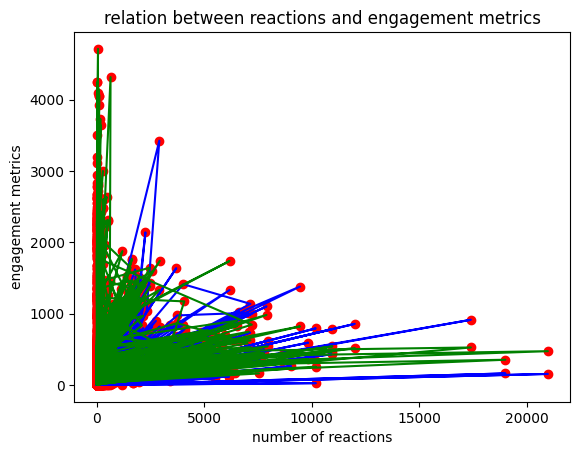

In [ ]:
#2. is there any corelation between number of reactions and other engagement metrics such as comments and shares? if so what is the direction of this correlation?
num_com = X_org[:,5]
num_shar = X_org[:,6]
num_re = X_org[:,4]
plt.plot(num_re,num_com,color='blue') #comments
plt.scatter(num_re,num_com,color='red')
plt.plot(num_re,num_shar,color='green') #shares
plt.scatter(num_re,num_shar,color='red')
plt.xlabel('number of reactions')
plt.ylabel("engagement metrics")
plt.title('relation between reactions and engagement metrics')
plt.show()


In [ ]:
print(X_org)

[[1 'video' '4/22/2018 6:00' ... 1 1 0]
 [2 'photo' '4/21/2018 22:45' ... 0 0 0]
 [3 'video' '4/21/2018 6:17' ... 1 0 0]
 ...
 [7048 'photo' '9/21/2016 23:03' ... 0 0 0]
 [7049 'photo' '9/20/2016 0:43' ... 0 0 0]
 [7050 'photo' '9/10/2016 10:30' ... 0 0 0]]


In [ ]:
# 5. What is the count of each type of post?
photo_rows = X_df.loc[X_df['status_type']=='photo']
video_rows = X_df.loc[X_df['status_type']=='video']
link_rows = X_df.loc[X_df['status_type']=='link']
status_rows = X_df.loc[X_df['status_type']=='status']
print(photo_rows)
print(video_rows)
print(link_rows)
print(status_rows)


     status_type  num_reactions  num_comments  num_shares  num_likes  \
1          photo            150             0           0        150   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
5          photo            217             6           0        211   
8          photo            203             1           0        198   
...          ...            ...           ...         ...        ...   
7045       photo             89             0           0         89   
7046       photo             16             0           0         14   
7047       photo              2             0           0          1   
7048       photo            351            12          22        349   
7049       photo             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
1             0         0          0         0           0  
3            

In [ ]:
p_count= np.size(photo_rows.iloc[:,0].values)
print("number of photos: ",p_count)
v_count= np.size(video_rows.iloc[:,0].values)
print("number of videos: ",v_count)
l_count= np.size(link_rows.iloc[:,0].values)
print("number of links: ",l_count)
s_count= np.size(status_rows.iloc[:,0].values)
print("number of status: ",s_count)

number of photos:  4288
number of videos:  2334
number of links:  63
number of status:  365


In [ ]:
#6. what is the average value of num_reaction, num_comments, num_shares for each post type?
#num_reactions average
photo_avg= np.average(photo_rows.iloc[:,1].values)
print("average number of reactions on photos: ", (photo_avg))
video_avg= np.average(video_rows.iloc[:,1].values)
print("average number of reactions on videos: ",video_avg)
link_avg= np.average(link_rows.iloc[:,1].values)
print("average number of reactions on links: ",link_avg)
status_avg= np.average(status_rows.iloc[:,1].values)
print("average number of reactions on status: ",status_avg)


average number of reactions on photos:  181.29034514925374
average number of reactions on videos:  283.4095972579263
average number of reactions on links:  370.14285714285717
average number of reactions on status:  438.78356164383564


In [ ]:
#num_comments average
photo_avg= np.average(photo_rows.iloc[:,2].values)
print("average number of comments on photos: ", photo_avg)
video_avg= np.average(video_rows.iloc[:,2].values)
print("average number of comments on videos: ",video_avg)
link_avg= np.average(link_rows.iloc[:,2].values)
print("average number of comments on links: ",link_avg)
status_avg= np.average(status_rows.iloc[:,2].values)
print("average number of comments on status: ",status_avg)

average number of comments on photos:  15.993470149253731
average number of comments on videos:  642.478149100257
average number of comments on links:  5.698412698412699
average number of comments on status:  36.23835616438356


In [ ]:
#num_shares average
photo_avg= np.average(photo_rows.iloc[:,3].values)
print("average number of shares on photos: ", photo_avg)
video_avg= np.average(video_rows.iloc[:,3].values)
print("average number of shares on videos: ",video_avg)
link_avg= np.average(link_rows.iloc[:,3].values)
print("average number of shares on links: ",link_avg)
status_avg= np.average(status_rows.iloc[:,3].values)
print("average number of shares on status: ",status_avg)

average number of shares on photos:  2.5538712686567164
average number of shares on videos:  115.67994858611826
average number of shares on links:  4.396825396825397
average number of shares on status:  2.558904109589041
